In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn import preprocessing
from imblearn.datasets import make_imbalance
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import inspection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from mlens.visualization import corrmat
from joblib import dump, load

Here the sea ice velocity has been classified into three categories based on their magnitude. Predicting the extreme high or low values can be a common probelm in regression. So the idea is to first clssify them into two or three categories based on their intensity and then doing regression analysis on them. 

In [3]:
df = pd.read_excel('modified_trainset.xlsx')
print(df.columns)


Index(['day_no', 'year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_buoy',
       'v_buoy', 'val_mag', 'vel_dir', 'ice_quadrant', 'u_ERA5', 'v_ERA5',
       'wind_val_mag', 'wind_quadrant', 'wind_dir', 'sic_CDR', 'h_piomas',
       'd2c'],
      dtype='object')


In [4]:
var=df.copy()
var.head()

,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,vel_dir,ice_quadrant,u_ERA5,v_ERA5,wind_val_mag,wind_quadrant,wind_dir,sic_CDR,h_piomas,d2c
0,0,1979,2,49,147.506958,138.582672,-0.797554,1.114740,1.370671,125.582277,2,-6.704156,-0.321260,6.711849,3,182.743485,0.990195,3.189743,522.523298
1,0,1979,2,49,146.834778,120.509880,0.643200,0.368754,0.741408,29.826147,1,-6.818630,-0.674205,6.851881,3,185.646875,0.966372,2.484009,412.767669
2,0,1979,2,49,130.993561,129.623672,-1.162420,0.243717,1.187695,168.158690,2,-8.825469,1.123955,8.896751,2,172.742248,0.996022,2.474106,362.547379
3,0,1979,2,49,147.524719,157.382492,0.919766,0.025784,0.920127,1.605796,1,-1.079951,-1.035410,1.496117,3,223.793757,0.982681,3.740522,381.025629
4,1,1979,2,50,147.470963,138.599823,0.380940,1.243485,1.300527,72.967623,1,-2.169171,2.537787,3.338513,2,130.522141,0.990302,3.188522,521.535334


In [5]:
var.head()

,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,vel_dir,ice_quadrant,u_ERA5,v_ERA5,wind_val_mag,wind_quadrant,wind_dir,sic_CDR,h_piomas,d2c
0,0,1979,2,49,147.506958,138.582672,-0.797554,1.114740,1.370671,125.582277,2,-6.704156,-0.321260,6.711849,3,182.743485,0.990195,3.189743,522.523298
1,0,1979,2,49,146.834778,120.509880,0.643200,0.368754,0.741408,29.826147,1,-6.818630,-0.674205,6.851881,3,185.646875,0.966372,2.484009,412.767669
2,0,1979,2,49,130.993561,129.623672,-1.162420,0.243717,1.187695,168.158690,2,-8.825469,1.123955,8.896751,2,172.742248,0.996022,2.474106,362.547379
3,0,1979,2,49,147.524719,157.382492,0.919766,0.025784,0.920127,1.605796,1,-1.079951,-1.035410,1.496117,3,223.793757,0.982681,3.740522,381.025629
4,1,1979,2,50,147.470963,138.599823,0.380940,1.243485,1.300527,72.967623,1,-2.169171,2.537787,3.338513,2,130.522141,0.990302,3.188522,521.535334


In [6]:
var = var[['day_no', 'year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_buoy',
       'v_buoy', 'val_mag', 'u_ERA5', 'v_ERA5','sic_CDR', 'h_piomas','d2c']]

In [7]:
var.shape

(339203, 14)

In [8]:
var.columns

Index(['day_no', 'year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_buoy',
       'v_buoy', 'val_mag', 'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_piomas', 'd2c'],
      dtype='object')

In [9]:
var.dtypes

day_no        int64
year          int64
month         int64
doy           int64
x_EASE      float64
y_EASE      float64
u_buoy      float64
v_buoy      float64
val_mag     float64
u_ERA5      float64
v_ERA5      float64
sic_CDR     float64
h_piomas    float64
d2c         float64
dtype: object

In [10]:
var.describe()

,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c
count,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000,339203.000000
mean,10374.519264,2007.017715,6.746862,189.943291,163.580333,156.494980,-0.333268,1.360217,8.354355,-0.096073,0.335635,0.955251,2.069756,418.241205
std,3587.901557,9.817846,3.453604,105.545448,24.443882,34.704966,8.075045,7.860813,7.691850,4.320043,4.123823,0.124664,0.922228,259.875226
min,0.000000,1979.000000,1.000000,1.000000,39.168983,36.870293,-74.682899,-66.781601,0.000000,-23.084634,-20.146717,0.000027,0.000000,0.359009
25%,7860.500000,2000.000000,4.000000,101.000000,146.797035,129.199318,-3.725245,-2.324845,2.888850,-3.149338,-2.617492,0.976678,1.478115,210.261503
50%,11106.000000,2009.000000,7.000000,190.000000,161.220627,152.304901,-0.024725,0.321954,6.665244,-0.165271,0.289756,1.000000,2.041318,389.715241
75%,13293.000000,2015.000000,10.000000,285.000000,181.103218,179.585617,2.943056,4.967892,11.675371,2.933966,3.203830,1.000000,2.619862,599.311791
max,14925.000000,2019.000000,12.000000,364.000000,279.391541,279.562073,68.396103,68.639801,75.609704,17.911558,22.862028,1.000000,6.284669,1120.364872


# classifying the velocity magnitudes into 3 categories based on their intensity and number of values in that range

In [11]:
range1 = list(np.arange(0,1,.1)) + list(np.arange(.91,.99,.01)) + list(np.arange(.99,1.0001,.001))
p = var.val_mag.quantile(range1)

In [12]:
df1 = pd.DataFrame(p)
df1.head()

,val_mag
0.0,0.000000
0.1,0.502237
0.2,2.107865
0.3,3.636044
0.4,5.110915


In [13]:
a=[]
for i in df1.iterrows():
    percentile_value = i[1]['val_mag']
    size = var[var['val_mag']<=percentile_value].shape[0]
    a.append(size)

In [14]:
b=[0]+a
del b[-1]

In [15]:
print(len(b))
print(b)

29
[0, 9104, 33921, 67841, 101761, 135681, 169602, 203522, 237442, 271362, 305282, 308674, 312066, 315458, 318850, 322242, 325634, 329026, 332418, 335810, 336150, 336489, 336828, 337167, 337506, 337846, 338185, 338524, 338863]


In [16]:
print(len(a))
print(a)

29
[9104, 33921, 67841, 101761, 135681, 169602, 203522, 237442, 271362, 305282, 308674, 312066, 315458, 318850, 322242, 325634, 329026, 332418, 335810, 336150, 336489, 336828, 337167, 337506, 337846, 338185, 338524, 338863, 339203]


In [17]:
c = np.array(a) - np.array(b)
print(c)

[ 9104 24817 33920 33920 33920 33921 33920 33920 33920 33920  3392  3392
  3392  3392  3392  3392  3392  3392  3392   340   339   339   339   339
   340   339   339   339   340]


In [18]:
df1['count'] = c

In [19]:
df1


,val_mag,count
0.000,0.000000,9104
0.100,0.502237,24817
0.200,2.107865,33920
0.300,3.636044,33920
0.400,5.110915,33920
0.500,6.665244,33921
0.600,8.390036,33920
0.700,10.439153,33920
0.800,13.151437,33920
0.900,17.649177,33920


In [20]:
var['type'] = var.val_mag.map(lambda x: 0 if x == 0 else 2 if x > 30 else 1)

In [21]:
print(var['type'].value_counts())

1    323755
0      9104
2      6344
Name: type, dtype: int64


In [22]:
#create dummy variables for multiclass predictor
cov_dummy = pd.get_dummies(var['type'])
cov_dummy.head()
cov_dummy.shape

(339203, 3)

In [23]:
df2 = pd.concat([cov_dummy, var], axis = 1)
print(df2.shape)
df2.head()

(339203, 18)


,0,1,2,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,type
0,0,1,0,0,1979,2,49,147.506958,138.582672,-0.797554,1.114740,1.370671,-6.704156,-0.321260,0.990195,3.189743,522.523298,1
1,0,1,0,0,1979,2,49,146.834778,120.509880,0.643200,0.368754,0.741408,-6.818630,-0.674205,0.966372,2.484009,412.767669,1
2,0,1,0,0,1979,2,49,130.993561,129.623672,-1.162420,0.243717,1.187695,-8.825469,1.123955,0.996022,2.474106,362.547379,1
3,0,1,0,0,1979,2,49,147.524719,157.382492,0.919766,0.025784,0.920127,-1.079951,-1.035410,0.982681,3.740522,381.025629,1
4,0,1,0,1,1979,2,50,147.470963,138.599823,0.380940,1.243485,1.300527,-2.169171,2.537787,0.990302,3.188522,521.535334,1


In [24]:
df2_column_names = list(df2.columns)
df2_column_names.remove('type')
df2_column_names

[0,
 1,
 2,
 'day_no',
 'year',
 'month',
 'doy',
 'x_EASE',
 'y_EASE',
 'u_buoy',
 'v_buoy',
 'val_mag',
 'u_ERA5',
 'v_ERA5',
 'sic_CDR',
 'h_piomas',
 'd2c']

In [25]:
# Normalize all columns

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(data=x_scaled, columns=df2_column_names)


In [26]:
print(df_normalized.shape)
print(df2.shape)

(339203, 17)
(339203, 18)


In [27]:
df_normalized

,0,1,2,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c
0,0.0,1.0,0.0,0.000000,0.0,0.090909,0.132231,0.450990,0.419101,0.516395,0.501371,0.018128,0.399561,0.460963,0.990195,0.507543,0.466216
1,0.0,1.0,0.0,0.000000,0.0,0.090909,0.132231,0.448192,0.344633,0.526465,0.495862,0.009806,0.396769,0.452757,0.966371,0.395249,0.368220
2,0.0,1.0,0.0,0.000000,0.0,0.090909,0.132231,0.382248,0.382186,0.513845,0.494939,0.015708,0.347817,0.494566,0.996022,0.393673,0.323381
3,0.0,1.0,0.0,0.000000,0.0,0.090909,0.132231,0.451064,0.496565,0.528398,0.493330,0.012169,0.536749,0.444359,0.982681,0.595182,0.339879
4,0.0,1.0,0.0,0.000067,0.0,0.090909,0.134986,0.450840,0.419172,0.524632,0.502322,0.017201,0.510181,0.527439,0.990301,0.507349,0.465334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339198,0.0,1.0,0.0,1.000000,1.0,1.000000,1.000000,0.641335,0.559853,0.515112,0.406754,0.155264,0.501463,0.328627,1.000000,0.257773,0.626741
339199,0.0,1.0,0.0,1.000000,1.0,1.000000,1.000000,0.704564,0.433388,0.471313,0.454077,0.118676,0.450518,0.459557,1.000000,0.205095,0.321545
339200,0.0,1.0,0.0,1.000000,1.0,1.000000,1.000000,0.441653,0.450116,0.515583,0.509253,0.031289,0.610437,0.494453,1.000000,0.311926,0.351284
339201,0.0,1.0,0.0,1.000000,1.0,1.000000,1.000000,0.644204,0.566721,0.521261,0.406065,0.155961,0.502881,0.343724,1.000000,0.256321,0.606871


In [28]:
RANDOM_STATE = 7

In [29]:
#append Y axis back to this 
df_normalized_w_target = pd.concat([df_normalized, df2['type']], axis=1)
df_normalized_w_target.tail()

,0,1,2,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,type
339198,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.641335,0.559853,0.515112,0.406754,0.155264,0.501463,0.328627,1.000000,0.257773,0.626741,1
339199,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.704564,0.433388,0.471313,0.454077,0.118676,0.450518,0.459557,1.000000,0.205095,0.321545,1
339200,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.441653,0.450116,0.515583,0.509253,0.031289,0.610437,0.494453,1.000000,0.311926,0.351284,1
339201,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.644204,0.566721,0.521261,0.406065,0.155961,0.502881,0.343724,1.000000,0.256321,0.606871,1
339202,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.254926,0.506398,0.521970,0.493139,0.000000,0.596570,0.638411,0.949973,0.213090,0.010146,0


In [30]:
# set target data  and x values
X=df_normalized_w_target[list(df_normalized_w_target.columns)[3:-1]]
print(X.shape)
X.head()

(339203, 14)


,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c
0,0.000000,0.0,0.090909,0.132231,0.450990,0.419101,0.516395,0.501371,0.018128,0.399561,0.460963,0.990195,0.507543,0.466216
1,0.000000,0.0,0.090909,0.132231,0.448192,0.344633,0.526465,0.495862,0.009806,0.396769,0.452757,0.966371,0.395249,0.368220
2,0.000000,0.0,0.090909,0.132231,0.382248,0.382186,0.513845,0.494939,0.015708,0.347817,0.494566,0.996022,0.393673,0.323381
3,0.000000,0.0,0.090909,0.132231,0.451064,0.496565,0.528398,0.493330,0.012169,0.536749,0.444359,0.982681,0.595182,0.339879
4,0.000067,0.0,0.090909,0.134986,0.450840,0.419172,0.524632,0.502322,0.017201,0.510181,0.527439,0.990301,0.507349,0.465334


In [31]:
X.shape

(339203, 14)

In [32]:
X = X.drop(['u_buoy', 'v_buoy','val_mag'],axis=1)

In [33]:
X.shape

(339203, 11)

In [34]:
X.columns

Index(['day_no', 'year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_ERA5',
       'v_ERA5', 'sic_CDR', 'h_piomas', 'd2c'],
      dtype='object')

In [35]:
Y=df_normalized_w_target[list(df_normalized_w_target.columns)[-1]]
print(Y.shape)
Y.head()


(339203,)


0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int64

In [36]:
print(X.shape)
print(Y.shape)

(339203, 11)
(339203,)


In [37]:
#sample the data, 6300 per output
x, y = make_imbalance(X, Y,
                      sampling_strategy={0: 6300, 1: 6300, 2: 6300},
                      random_state=RANDOM_STATE)

In [38]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=RANDOM_STATE)

In [39]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({2: 4736, 0: 4733, 1: 4706})
Testing target statistics: Counter({1: 1594, 0: 1567, 2: 1564})


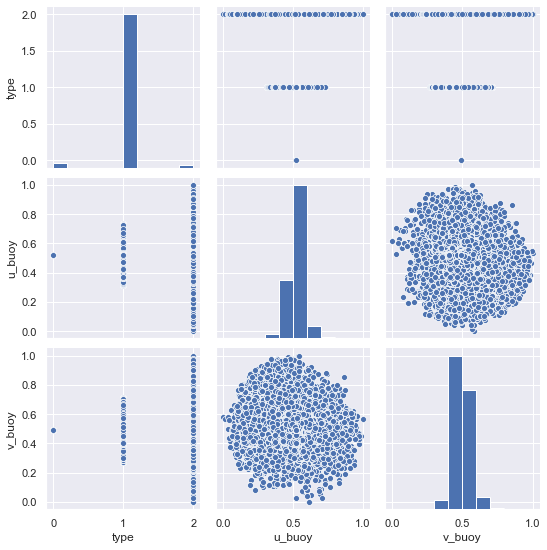

In [40]:
sns.set()
cols2 = ['type', 'u_buoy', 'v_buoy']
sns.pairplot(df_normalized_w_target[cols2], height = 2.5)
plt.show();

In [41]:
clf = DecisionTreeClassifier(random_state=7)

In [42]:
clf = clf.fit(X_train, y_train)

In [43]:
dtree = DecisionTreeClassifier( random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
predictions = dtree.predict(X_test)

In [45]:
print ("Decision Tree Train Accuracy:", metrics.accuracy_score(y_train, dtree.predict(X_train)))
print ("Decision Tree Test Accuracy:", metrics.accuracy_score(y_test, dtree.predict(X_test)))

Decision Tree Train Accuracy: 0.9998589065255732
Decision Tree Test Accuracy: 0.8747089947089947


In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1567
           1       0.82      0.84      0.83      1594
           2       0.89      0.86      0.88      1564

    accuracy                           0.87      4725
   macro avg       0.88      0.87      0.88      4725
weighted avg       0.88      0.87      0.87      4725



In [48]:
X_test

,day_no,year,month,doy,x_EASE,y_EASE,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c
13723,0.968643,0.975,0.727273,0.716253,0.687178,0.464266,0.587272,0.522515,0.162757,0.016351,0.494926
1447,0.810787,0.825,0.272727,0.264463,0.418170,0.385224,0.687469,0.365709,1.000000,0.406380,0.459169
5549,0.906600,0.925,0.181818,0.179063,0.822569,0.592322,0.575139,0.255510,0.962714,0.176069,0.141705
1634,0.808777,0.825,0.181818,0.181818,0.471470,0.624858,0.543142,0.466057,1.000000,0.488096,0.014663
10294,0.654472,0.650,0.909091,0.878788,0.560221,0.521393,0.587147,0.337018,1.000000,0.312133,0.732446
...,...,...,...,...,...,...,...,...,...,...,...
11744,0.753568,0.750,1.000000,0.928375,0.567032,0.392819,0.481061,0.705515,1.000000,0.202081,0.745225
15978,0.211256,0.200,0.818182,0.768595,0.521094,0.839908,0.502362,0.760485,0.967299,0.148617,0.097660
4371,0.649581,0.650,0.727273,0.677686,0.592524,0.706087,0.598211,0.472945,0.999134,0.243234,0.272368
17824,0.973802,0.975,1.000000,0.928375,0.511375,0.276499,0.364072,0.539611,0.940313,0.086677,0.222779


In [49]:
print(confusion_matrix(y_test,predictions))

[[1443  108   16]
 [ 101 1340  153]
 [  37  177 1350]]


Text(0, 0.5, 'Accuracy Rate')

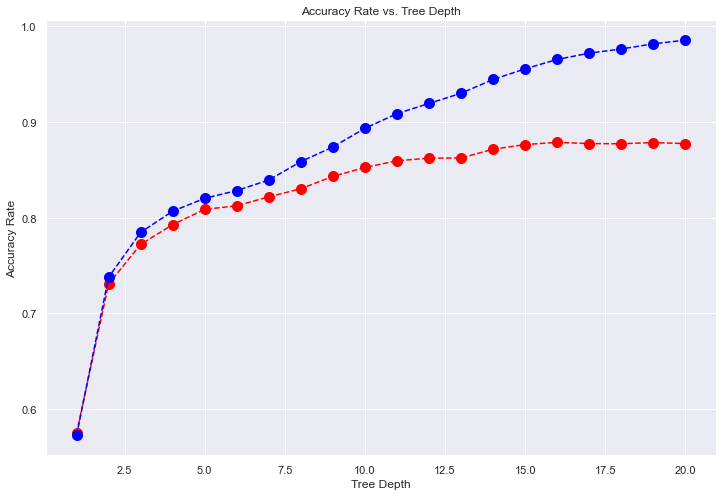

In [50]:
accuracy_rate = []
training_acc = []

for i in range(1,21):   
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train, y_train) 
    accuracy_rate.append(dtree.score(X_test, y_test))
    training_acc.append(dtree.score(X_train, y_train))


plt.figure(figsize=(12,8))

plt.plot(np.arange(1,21), accuracy_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(np.arange(1,21), training_acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Rate')

#blue - trianing accuracy 
# red - testing accuracyy

In [51]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
rfc_pred = rfc.predict(X_test)

In [53]:
y_pred =  rfc.predict(X_test)
print ("Random Forest Train Accuracy Baseline:", metrics.accuracy_score(y_train, rfc.predict(X_train)))
print ("Random Forest Test Accuracy Baselsine:", metrics.accuracy_score(y_test, rfc.predict(X_test)))

Random Forest Train Accuracy Baseline: 0.9997178130511464
Random Forest Test Accuracy Baselsine: 0.9185185185185185


In [54]:
print(confusion_matrix(y_test,rfc_pred))

[[1470   87   10]
 [  61 1413  120]
 [  18   89 1457]]


In [55]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1567
           1       0.89      0.89      0.89      1594
           2       0.92      0.93      0.92      1564

    accuracy                           0.92      4725
   macro avg       0.92      0.92      0.92      4725
weighted avg       0.92      0.92      0.92      4725



# Hyperparameter Tuning - Random Forest

In [56]:
#sample the data, 6300 per output
x, y = make_imbalance(X, Y,
                      sampling_strategy={0: 6300, 1: 6300, 2: 6300},
                      random_state=RANDOM_STATE)

In [57]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=5)

In [58]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({0: 4774, 2: 4713, 1: 4688})
Testing target statistics: Counter({1: 1612, 2: 1587, 0: 1526})


In [59]:
# Random forest baseline performance
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [60]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15, 20, None],
    'min_samples_leaf': [1, 10, 20, 50, 100,500],
    'min_samples_split': [2, 30, 40,100],
}
param_grid

{'bootstrap': [True],
 'max_depth': [10, 15, 20, None],
 'min_samples_leaf': [1, 10, 20, 50, 100, 500],
 'min_samples_split': [2, 30, 40, 100]}

In [61]:
# Create a based model
rfc_gs = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc_gs, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [62]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  8.2min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 20, None],
                         'min_samples_leaf': [1, 10, 20, 50, 100, 500],
                         'min_samples_split': [2, 30, 40, 100]},
             verbose=2)

In [63]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [64]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier()

In [65]:
optimal_param_grid = {
    'bootstrap': [True],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
}

In [66]:
grid_search = GridSearchCV(estimator = rfc, param_grid = optimal_param_grid, 
                          cv = 25, n_jobs = -1, verbose = 2)

In [67]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 25 folds for each of 1 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   22.3s finished


GridSearchCV(cv=25, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'min_samples_leaf': [1],
                         'min_samples_split': [2]},
             verbose=2)

In [68]:
rfc_pred_gs = grid_search.predict(X_test)

y_pred_gs =  grid_search.predict(X_test)
print ("Random Forest Train Accuracy Baseline After Grid Search:", metrics.accuracy_score(y_train, grid_search.predict(X_train)))
print ("Random Forest Test Accuracy Baseline After Grid Search:", metrics.accuracy_score(y_test, grid_search.predict(X_test)))

Random Forest Train Accuracy Baseline After Grid Search: 0.9997883597883598
Random Forest Test Accuracy Baseline After Grid Search: 0.9223280423280423


Text(0, 0.5, 'Accuracy Rate')

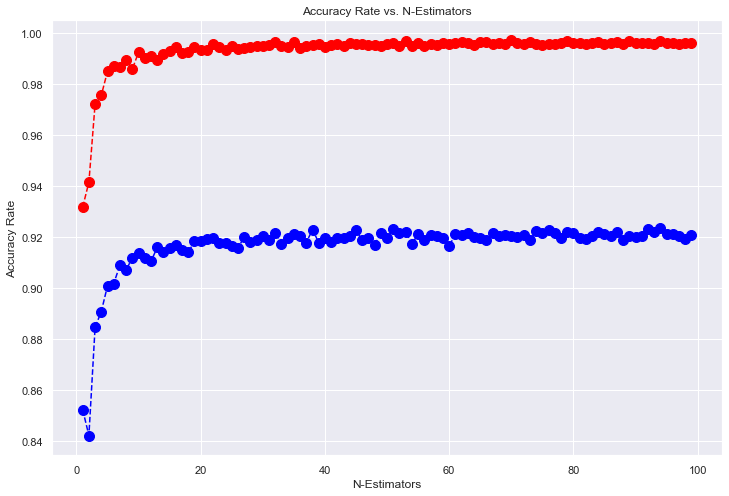

In [69]:
accuracy_rate = []
training_acc = []

for i in range(1,100):   
    rfc_plot = RandomForestClassifier(bootstrap=True,
                       max_depth=20, 
                       min_samples_leaf=1, min_samples_split=2,
                       n_estimators=i)
    rfc_plot.fit(X_train, y_train) 
    accuracy_rate.append(rfc_plot.score(X_test, y_test))
    training_acc.append(rfc_plot.score(X_train, y_train))
    
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,100), accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(np.arange(1,100), training_acc,color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

#training > testing
plt.title('Accuracy Rate vs. N-Estimators')
plt.xlabel('N-Estimators')
plt.ylabel('Accuracy Rate')